In [1]:
import importlib
import numpy as np
import pipeline
from importlib import reload

reload(pipeline)

<module 'pipeline' from 'C:\\Users\\einkina\\Documents\\School\\Manifold Learning\\manifold-learning\\pipeline.py'>

In [2]:
reload(pipeline)
control_vars = pipeline.get_control_vars(pipeline.get_p())
response_matrix = pipeline.generate_array_of_swiss_rolls(control_vars)
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = pipeline.prepare_data(control_vars, response_matrix)

In [3]:
reload(pipeline)
q = pipeline.solve_semidefinite_programming(standardized_x, centered_y, edges)

0.04925226683437373


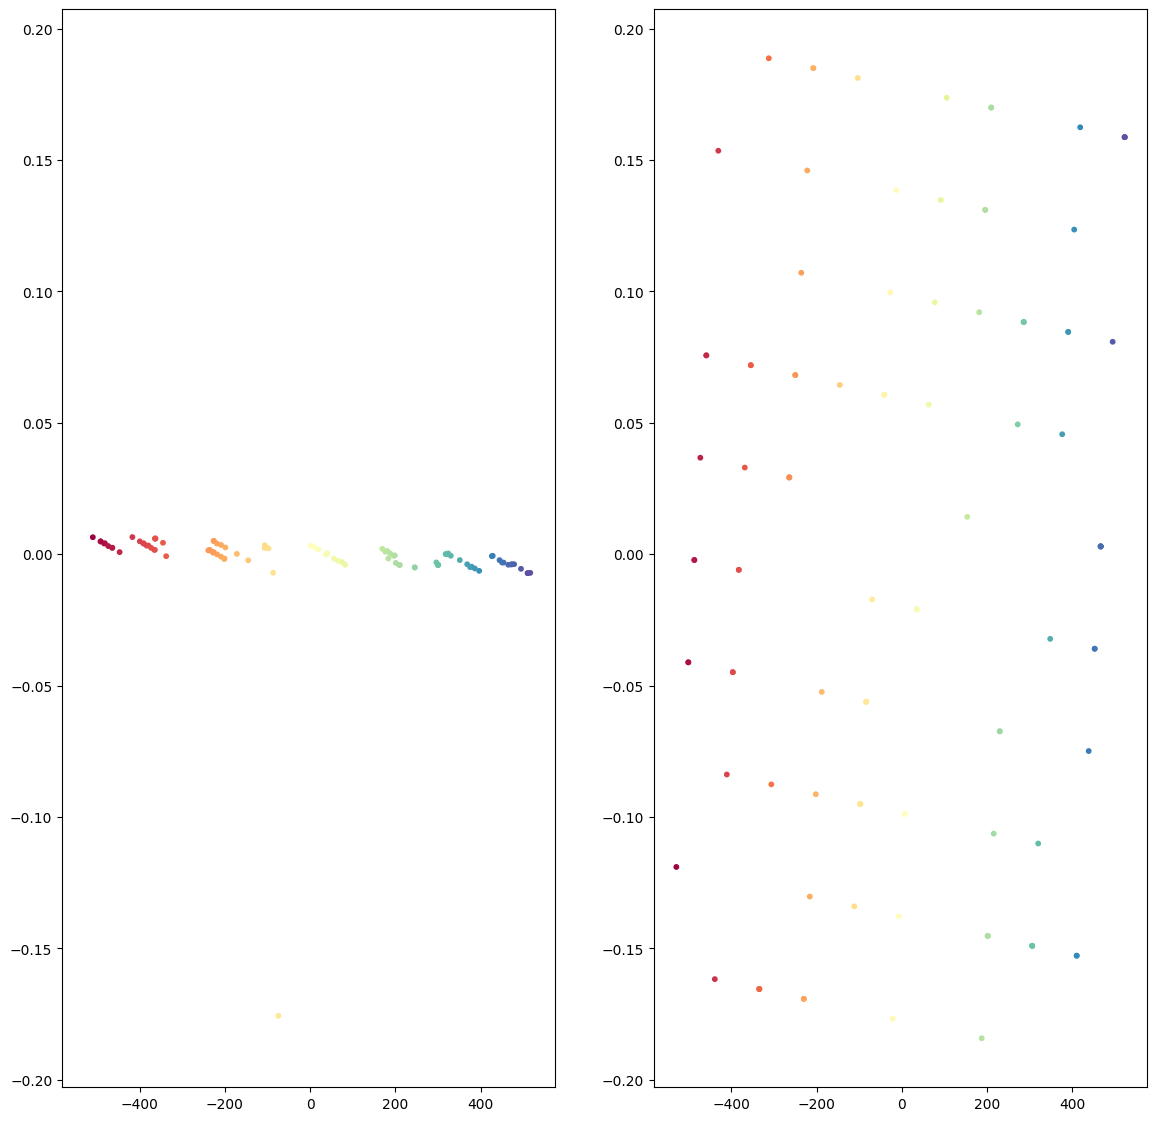

In [4]:
reload(pipeline)
ld_embedding = pipeline.reduce_dimensions(q)
regression_matrix = pipeline.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

print(pipeline.compute_rre(ld_embedding, reconstructed_y))
pipeline.plot_two_embeddings(ld_embedding, reconstructed_y)

In [5]:
reload(pipeline)
test_control_vars = pipeline.get_control_vars(pipeline.get_p())
test_rolls = pipeline.generate_array_of_swiss_rolls(test_control_vars, 10)
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = pipeline.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler)
    x_opt = x_opt * x_stds + x_means
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

-----------
x_opt  = [1.9519791  8.71079263], x_err = 1.342738617338082e-11
x_real = [5, 8]
-----------
x_opt  = [8.11199312 0.87789365], x_err = 1.3041075303994534e-11
x_real = [6, 2]
-----------
x_opt  = [6.40669591 5.94826048], x_err = 4.167252205730437e-12
x_real = [10, 5]
-----------
x_opt  = [8.02356987 5.82812373], x_err = 3.8407735493029966e-12
x_real = [1, 7]
-----------
x_opt  = [ 8.85634311 10.38778533], x_err = 2.490668318997978e-12
x_real = [4, 10]
-----------
x_opt  = [8.73653417 9.75487361], x_err = 3.571212515715109e-12
x_real = [10, 9]
-----------
x_opt  = [8.36199808 2.57060922], x_err = 7.302935631345621e-12
x_real = [2, 4]
-----------
x_opt  = [6.61208322 1.15102762], x_err = 5.9527901845769705e-12
x_real = [9, 2]
-----------
x_opt  = [6.42771078 3.76944436], x_err = 1.4652881964278123e-13
x_real = [5, 5]
-----------
x_opt  = [ 1.38485961 10.31780801], x_err = 7.615511187138675e-12
x_real = [5, 9]
